In [2]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import random
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
np.random.seed(66)

data_path = "E:/Mouse_V1/Multiome/"
ages = ["P21"] # , "P10", "P12", "P14", "P17", "P21"

adata = {}

for a in ages:
    adata[a] = sc.read_h5ad(data_path + a + "full_glut_v2.h5ad")

adata

{'P21': AnnData object with n_obs × n_vars = 23452 × 20124
     obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass', 'Class', 'Sample', 'total_counts', 'pct_counts_mt', 'n_genes_by_counts', 'total_counts_mt', 'Doublet?', 'P17 Mapping Prob', 'P21-2022 Mapping Label', 'P21-2022 Mapping Prob', 'P21-2022 Mapping Label_maj', 'Study', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1', 'leiden_1.9', 'leiden_2', 'Type_maj', 'Type_leiden', 'idx', 'Type_nn', 'Type_nn_dists'
     var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'Sample_colors', 'Subclass_colors', 'Type_colors', 'Type_leiden_colors', 'Type_nn_colors', 'Type_nn_dists_colors', 'leiden_1.3_colors', 'neighbors'
     obsm: 'X_harmony', 'X_pca', 'X_umap'
     obsp: 'connectivities', 'di

In [21]:
types = [typ for typ in np.unique(adata["P6"].obs["Type_maj"]) if not np.in1d(typ, ["Astro_Fem", "L2/3_Fem", "L4_Fem", "Pvalb_Fem", "Sst_Fem", "Vip_Fem", "OPC_Fem"])]

adata["P6"] = adata["P6"][np.in1d(adata["P6"].obs["Type_maj"], types), :]

In [22]:
types = [typ for typ in np.unique(adata["P8"].obs["Type_maj"]) if not np.in1d(typ, ["Astro_Fem", "Frem1", "L2/3_Fem", "L4_Fem", "Pvalb_Fem", "Sst_Fem", "Stac", "Vip_Fem", "L6CT_Fem"])]

adata["P8"] = adata["P8"][np.in1d(adata["P8"].obs["Type_maj"], types), :]

In [2]:
np.unique(adata["P8"].obs.groupby(["Sample", "Subclass"]).size().reset_index(name="Count")["Sample"])

array(['P8_1a', 'P8_1b', 'P8_2a', 'P8_2b', 'P8a', 'P8b', 'P8c'],
      dtype=object)

In [12]:
df = adata["P8"].obs.groupby(["Sample", "Subclass"]).size().reset_index(name="Count")
df.loc[df["Sample"] == "P8_2b", :]

,Sample,Subclass,Count
60,P8_2b,Astro,439
61,P8_2b,Endo,61
62,P8_2b,Frem1,19
63,P8_2b,L2/3,1169
64,P8_2b,L4,1277
65,P8_2b,L5IT,153
66,P8_2b,L5NP,83
67,P8_2b,L5PT,227
68,P8_2b,L6CT,780
69,P8_2b,L6IT,398


In [42]:
df

0        P6a
1        P6a
2        P6a
3        P6a
4        P6a
       ...  
135    P8_2b
136    P8_2b
137    P8_2b
138    P8_2b
139    P8_2b
Name: Sample, Length: 140, dtype: category
Categories (7, object): ['P6a', 'P6b', 'P6c', 'P8_1a', 'P8_1b', 'P8_2a', 'P8_2b']

In [28]:
adata["P6"].obs["Sample"]

AAACGCTCACTTCATT-1-P8_1a-2022 RNA-Excitatory        P8_1a
AAAGGATAGGTGCATG-1-P8_1a-2022 RNA-Excitatory        P8_1a
AAAGGGCCAGTATACC-1-P8_1a-2022 RNA-Excitatory        P8_1a
AAAGTCCCATATACCG-1-P8_1a-2022 RNA-Excitatory        P8_1a
AAATGGAGTCCACACG-1-P8_1a-2022 RNA-Excitatory        P8_1a
                                                    ...  
CTGTAGACAGATCACT-1-P8_2a-2022 RNA-Non-neurons       P8_2a
GAGGGAGCATCCGTAA-1-P6a-2023 Multiome-Non-neurons      P6a
GTGTAACAGGCGCTTC-1-P8_1a-2022 RNA-Non-neurons       P8_1a
TCCCACATCCATATGG-1-P8_2a-2022 RNA-Non-neurons       P8_2a
GTTACTAAGAGGGACT-1-P6b-2023 Multiome-Non-neurons      P6b
Name: Sample, Length: 38503, dtype: category
Categories (7, object): ['P6a', 'P6b', 'P6c', 'P8_1a', 'P8_1b', 'P8_2a', 'P8_2b']

In [56]:
classes = {"Excitatory" : [], "Inhibitory" : [], "Non-neurons" : []}
for a in ages:
    for c in classes.keys():
        fraction = np.sum(adata[a].obs["Class"] == c) / adata[a].shape[0]
        classes[c].append(fraction)

C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\1404488374.py:11: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B503546D30> starts with '_'. It is thus excluded from the legend.
  ax.legend(("_", "Glutamatergic", "_", "GABAergic", "_", "Non-Neuronal"))
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\1404488374.py:11: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B503546FD0> starts with '_'. It is thus excluded from the legend.
  ax.legend(("_", "Glutamatergic", "_", "GABAergic", "_", "Non-Neuronal"))
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\1404488374.py:11: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B50355F9A0> starts with '_'. It is thus excluded from the legend.
  ax.legend(("_", "Glutamatergic", "_", "GABAergic", "_", "Non-Neuronal"))


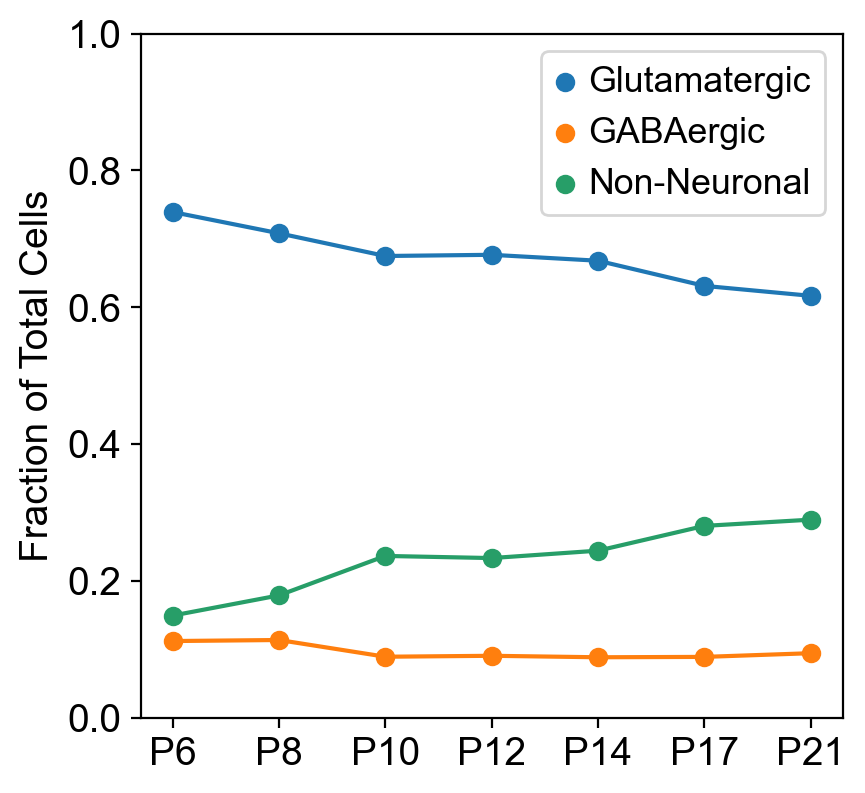

In [68]:
fig, ax = plt.subplots()

for c in ["Excitatory", "Inhibitory", "Non-neurons"]:
    ax.plot(classes[c])
    ax.scatter(range(7), classes[c])

ax.set_ylim(0, 1)
ax.set_ylabel("Fraction of Total Cells")
ax.set_xticks(range(7))
ax.set_xticklabels(ages)
ax.legend(("_", "Glutamatergic", "_", "GABAergic", "_", "Non-Neuronal"))
ax.grid(False)
fig.set_size_inches(4.5, 4.5)
plt.show(block=False)

In [74]:
sc_glut = ["L2/3", "L4", "L5IT", "L6IT", "L5PT", "L6CT", "L5NP", "L6b"]
subclasses = {k : [] for k in sc_glut}
for a in ages:
    for s in subclasses.keys():
        fraction = np.sum(adata[a].obs["Subclass"] == s) / np.sum(adata[a].obs["Class"] == "Excitatory")
        subclasses[s].append(fraction)

C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\2629024481.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B503A11EE0> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=4)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\2629024481.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B503A20670> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=4)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\2629024481.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B503A20C70> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=4)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\2629024481.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B5041BA3A0> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=4)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\2629024481.

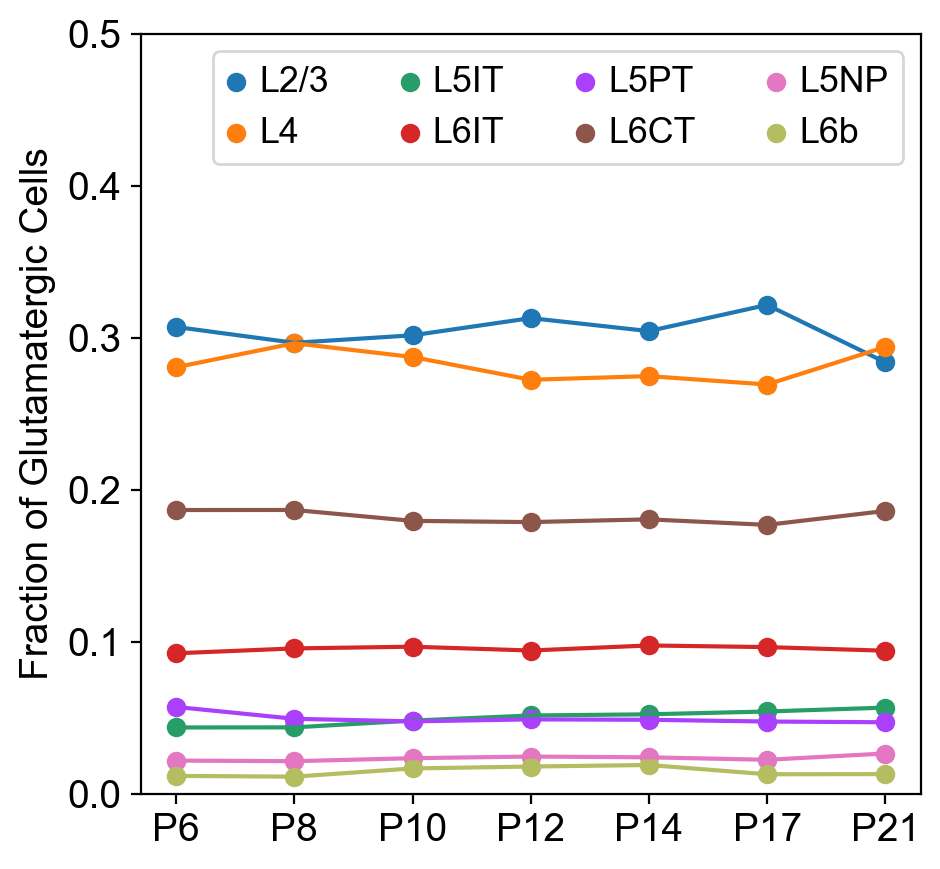

In [75]:
fig, ax = plt.subplots()

for s in sc_glut:
    ax.plot(subclasses[s])
    ax.scatter(range(7), subclasses[s])

ax.set_ylim(0, 0.5)
ax.set_ylabel("Fraction of Glutamatergic Cells")
ax.set_xticks(range(7))
ax.set_xticklabels(ages)
sc_leg = []
[sc_leg.extend(["_", sc]) for sc in sc_glut]
ax.legend(sc_leg, ncols=4)
ax.grid(False)
fig.set_size_inches(5, 5)
plt.show(block=False)

In [76]:
sc_gaba = ["Pvalb", "Sst", "Vip", "Lamp5", "Frem1", "Stac"]
subclasses = {k : [] for k in sc_gaba}
for a in ages:
    for s in subclasses.keys():
        fraction = np.sum(adata[a].obs["Subclass"] == s) / np.sum(adata[a].obs["Class"] == "Inhibitory")
        subclasses[s].append(fraction)

C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\3715551696.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B504260790> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=3)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\3715551696.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B504260DF0> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=3)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\3715551696.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B5042704C0> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=3)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\3715551696.py:13: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000001B504270A60> starts with '_'. It is thus excluded from the legend.
  ax.legend(sc_leg, ncols=3)
C:\Users\TLab\AppData\Local\Temp\ipykernel_17536\3715551696.

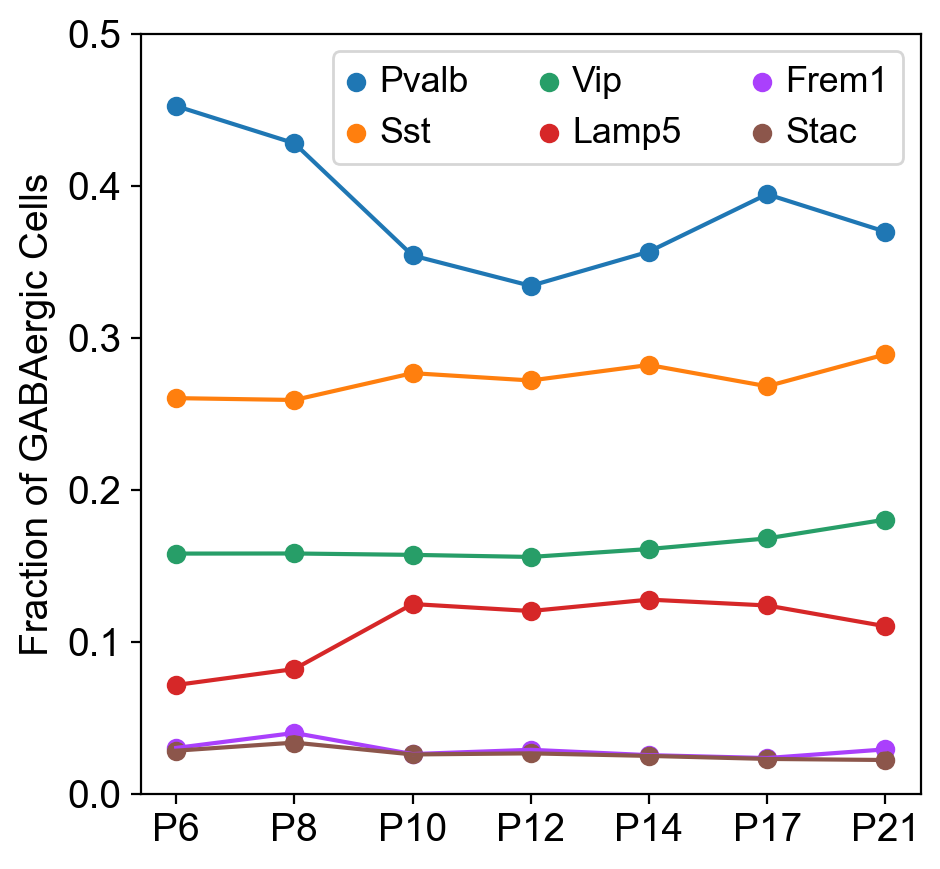

In [77]:
fig, ax = plt.subplots()

for s in sc_gaba:
    ax.plot(subclasses[s])
    ax.scatter(range(7), subclasses[s])

ax.set_ylim(0, 0.5)
ax.set_ylabel("Fraction of GABAergic Cells")
ax.set_xticks(range(7))
ax.set_xticklabels(ages)
sc_leg = []
[sc_leg.extend(["_", sc]) for sc in sc_gaba]
ax.legend(sc_leg, ncols=3)
ax.grid(False)
fig.set_size_inches(5, 5)
plt.show(block=False)

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


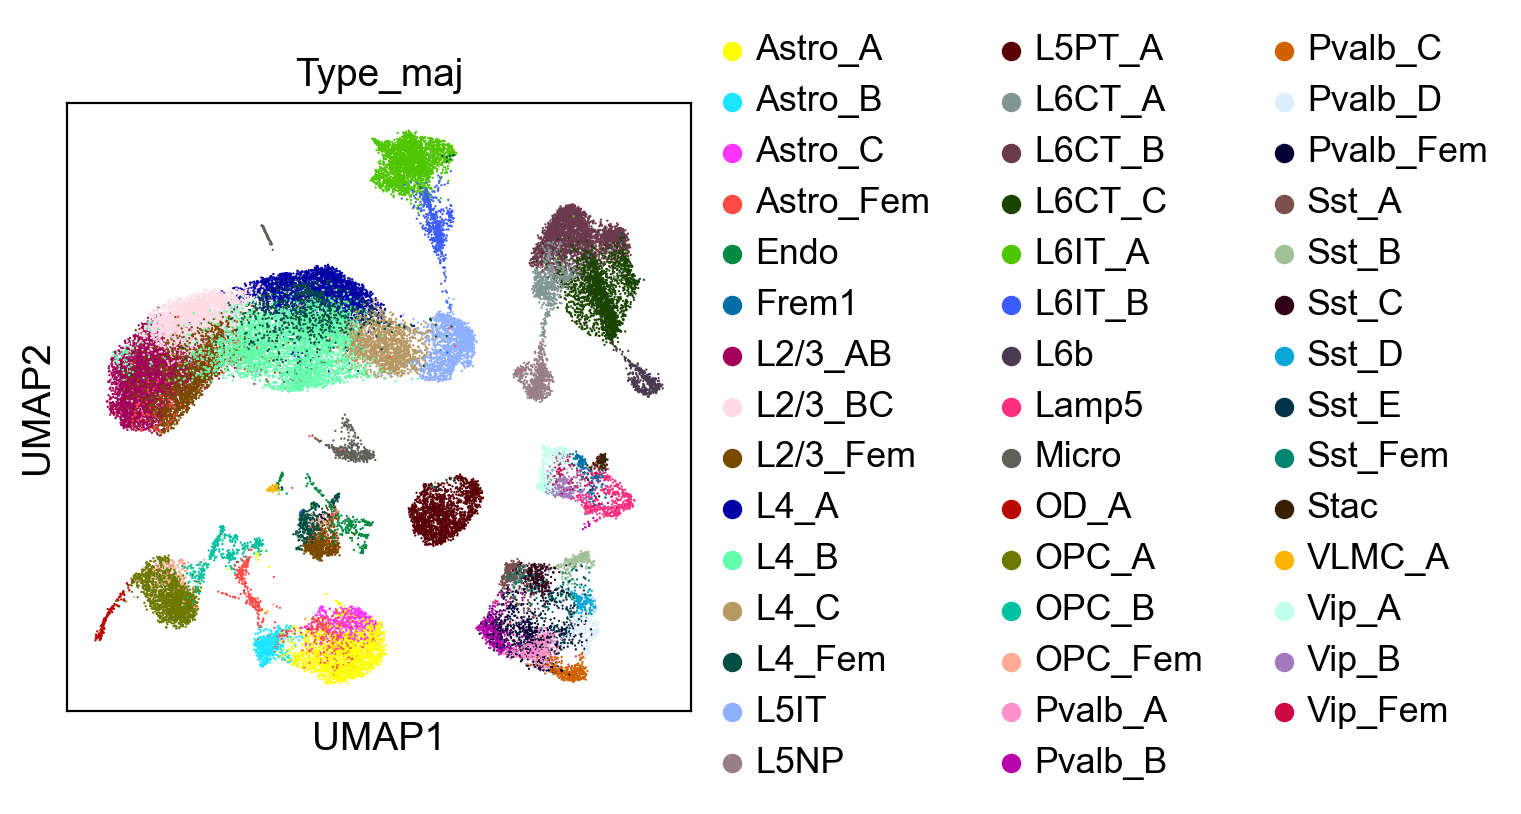

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


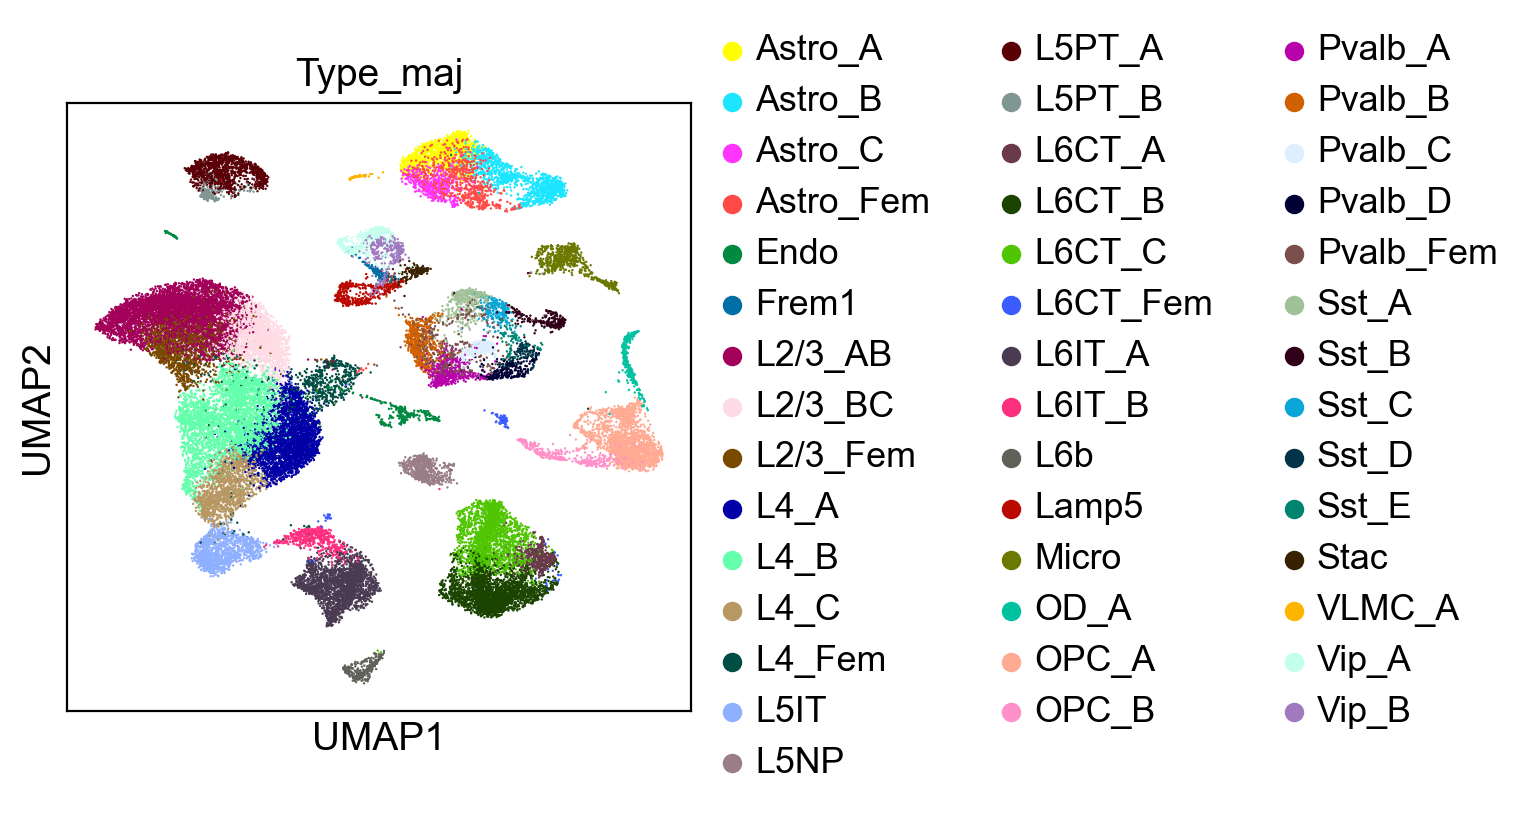

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


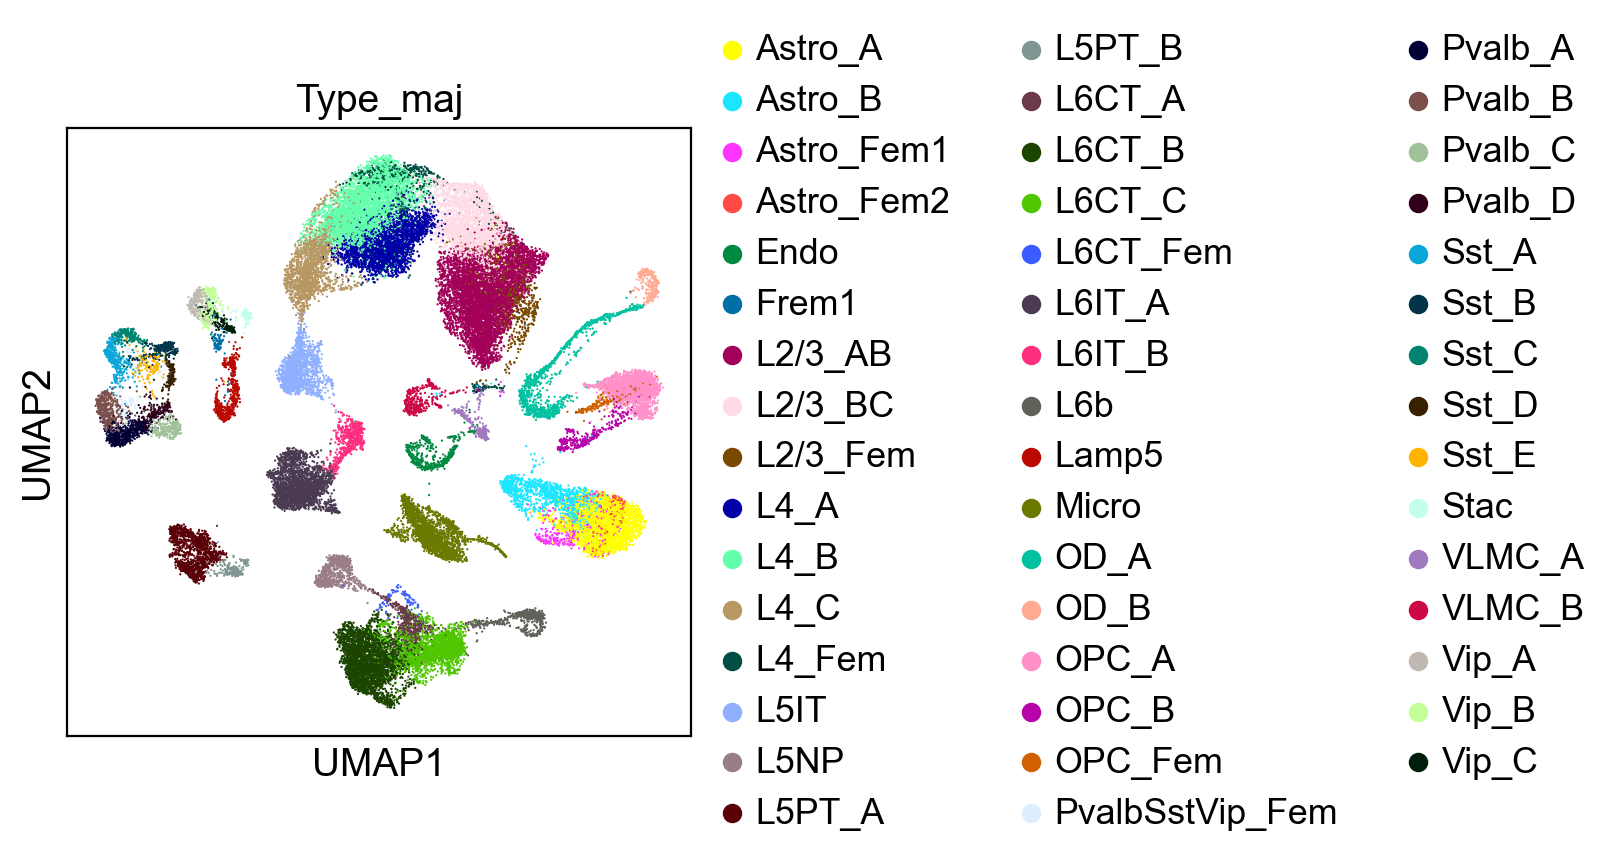

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


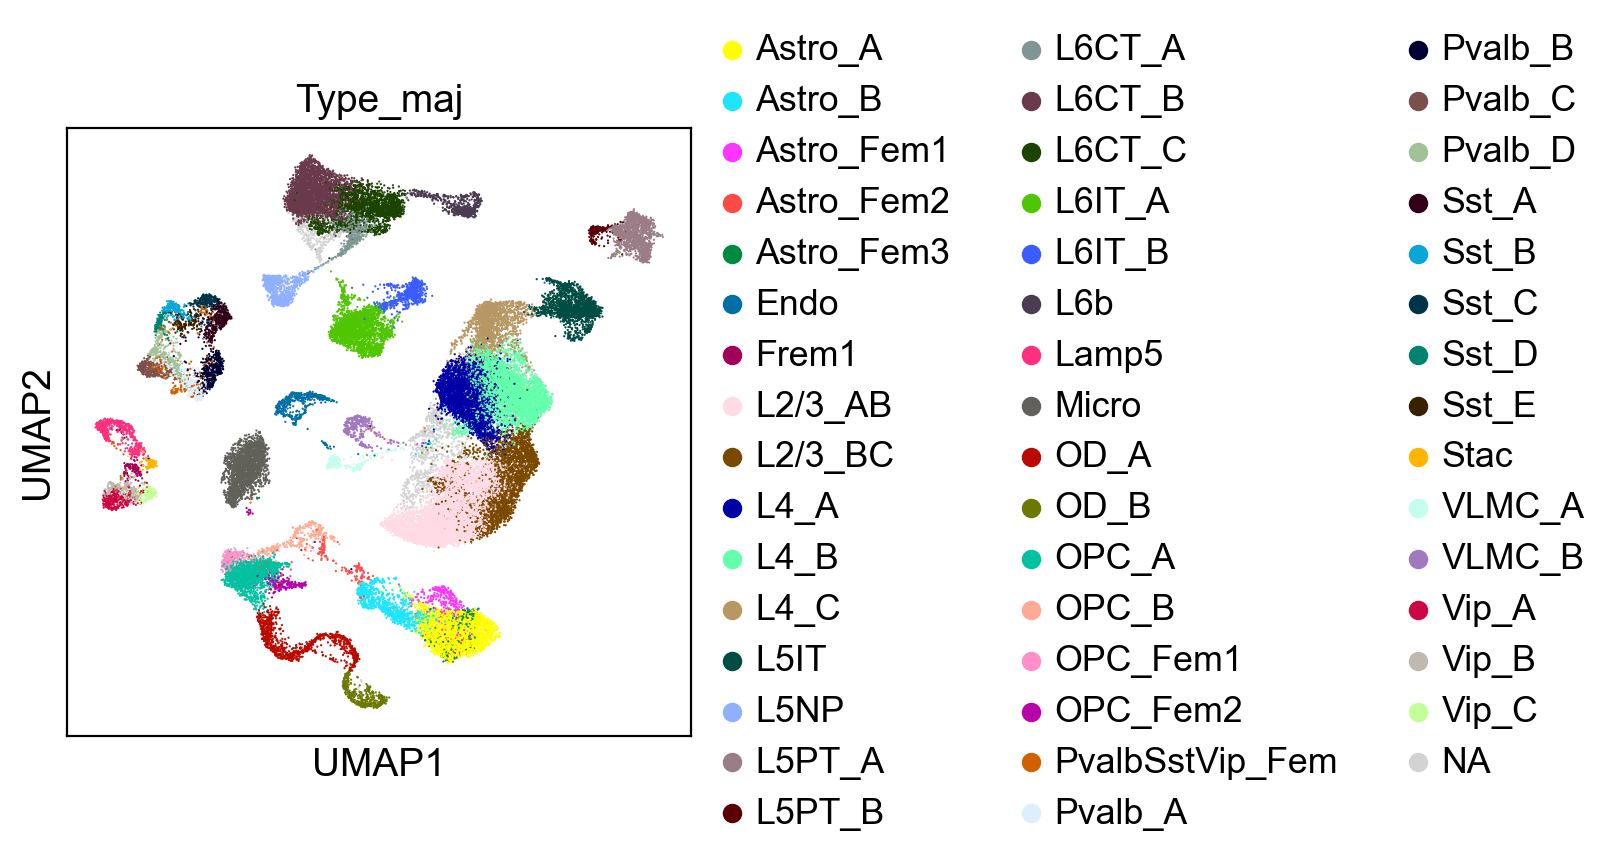

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


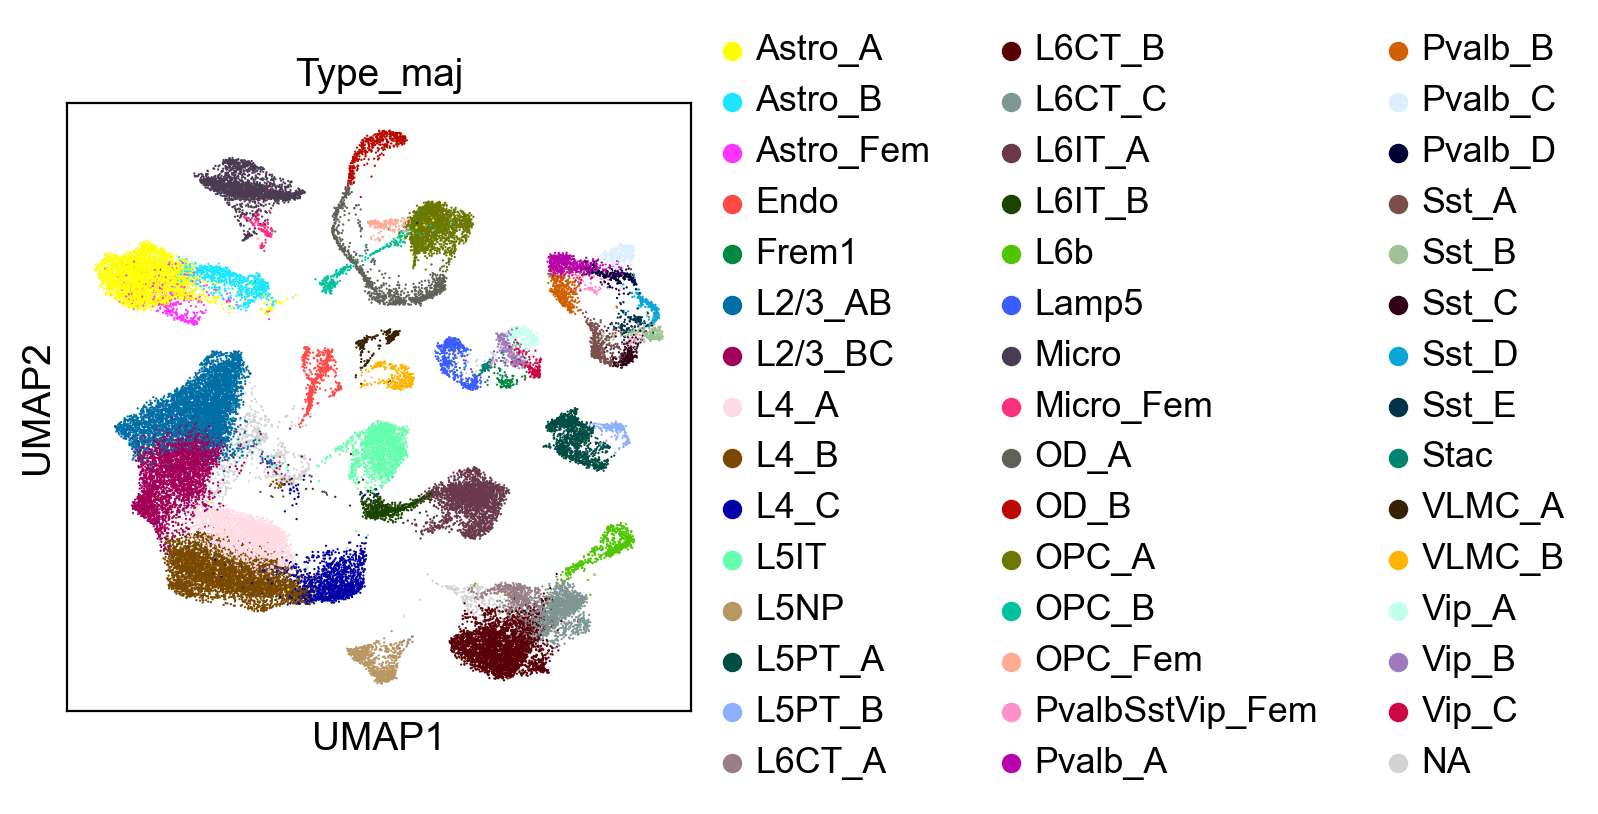

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


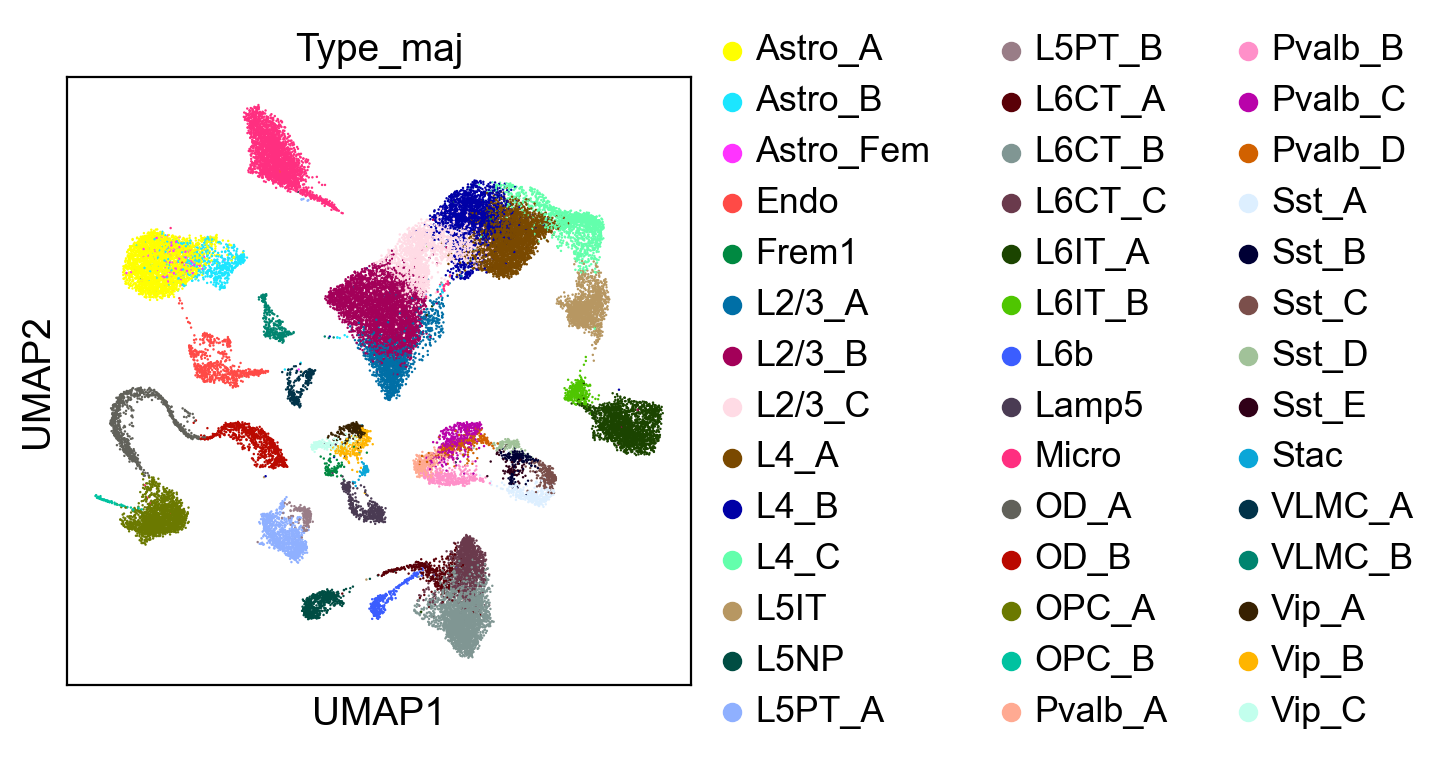

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


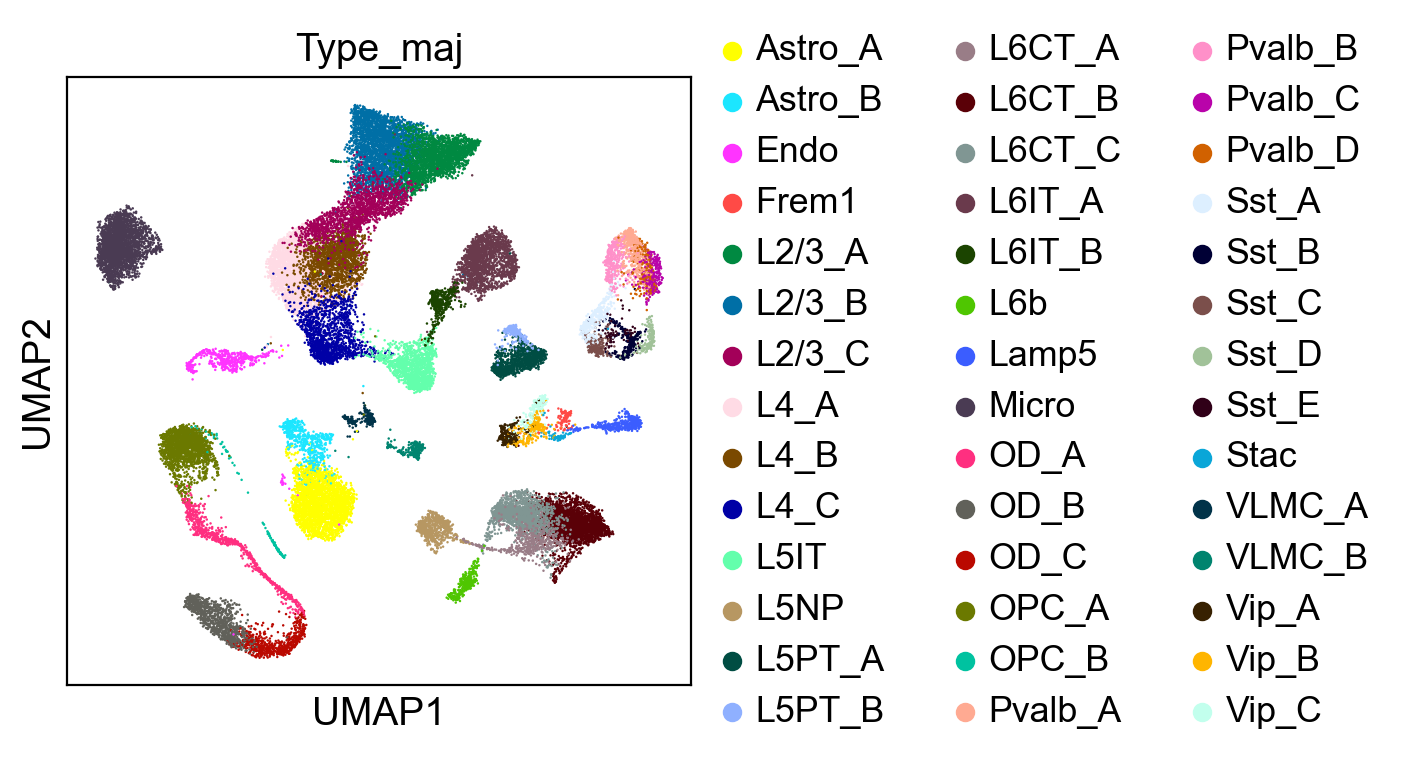

In [94]:
for a in ages:
    sc.pl.umap(adata[a], color=["Type_maj"])

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


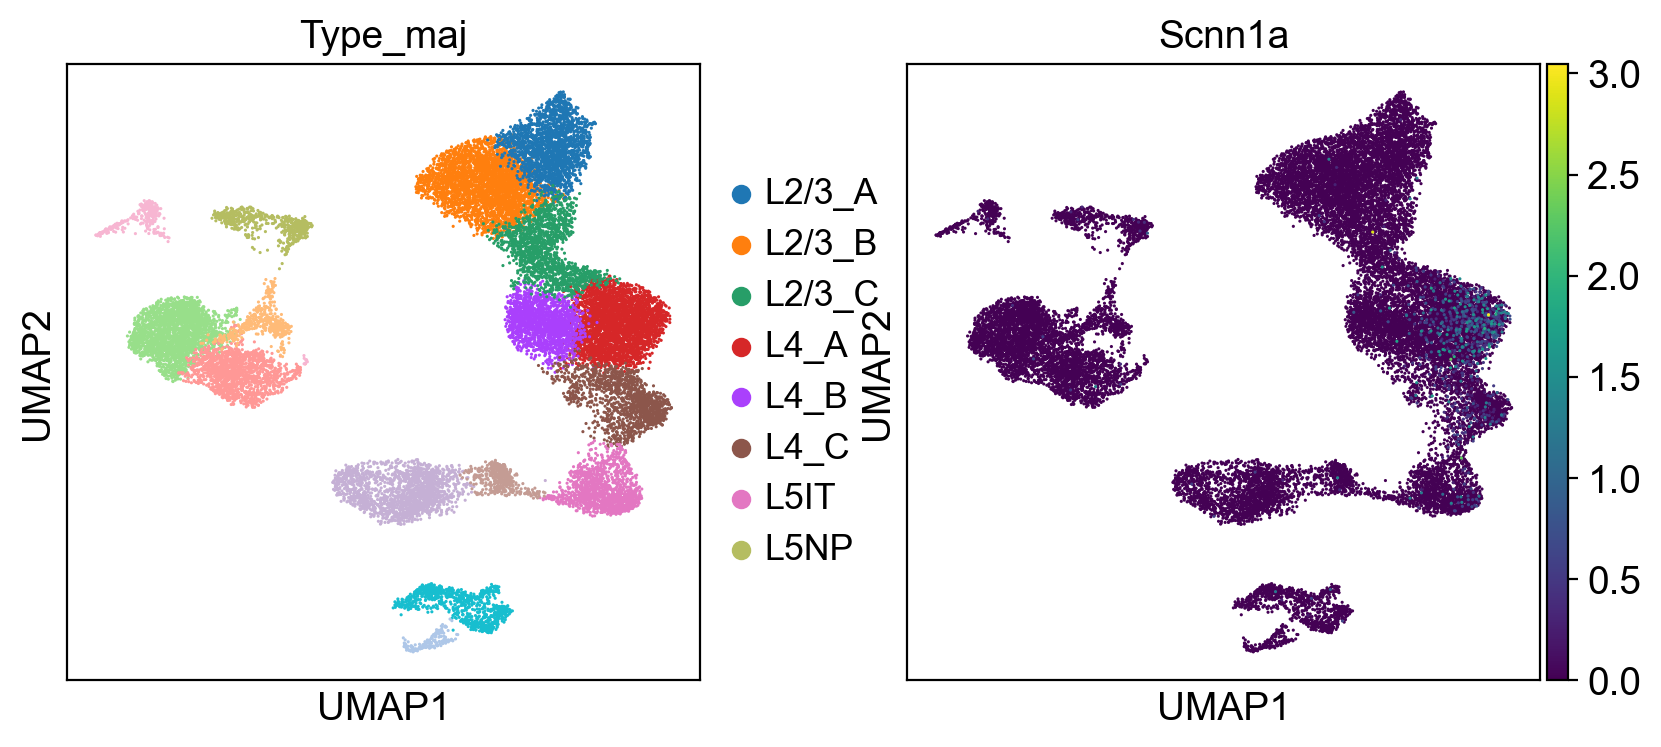

In [3]:
sc.pl.umap(adata["P21"], color=["Type_maj", "Scnn1a"])